# Recommendations System for Starbucks Users



## Table of Contents

1- [Introduction](#Intro)<br>
2- [Problem Statement](#Prob)<br>
3- [Scope](#Scope)<br>
4- [Significance](#Significance)<br>
5- [Input Data Description](#Input)<br>
6- [Strategy for Solving the Problem](#Strategy)<br>
7- [Discussion of the Expected Solution](#Discussion)<br>
8- [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
9- [Rank Based Recommendations](#Rank)<br>
10- [User-User Based Collaborative Filtering](#User-User)<br>
11- [Matrix Factorization](#Matrix-Fact)<br>
12- [Recommendation Algorithm Selection](#Recommendation)<br>
13- [Future Work Enhancements](#Future)<br>
14- [Recommend For a User](#Recommend)

<br><br><br>

##  <a class="anchor" id="Intro">Part 1: Introduction</a>

> In the era of data-driven decision-making, businesses are increasingly leveraging their accumulated customer data to extract valuable insights and enhance customer engagement strategies. Starbucks, a prominent player in the coffee industry, constantly seeks innovative approaches to personalize their offers and promotions to maximize their impact on customers. This project aims to contribute to this objective by utilizing Starbucks' offers data and employing recommendation algorithms that can help channel offers to those who are affected by them.

<br><br>

##  <a class="anchor" id="Prob">Part 2: Problem Statement</a>

> The primary challenge addressed in this project is implementing a recommendation system using Starbucks' offers. Given the diverse range of offers, various demographic information about users, and their historical interaction patterns, determining whether a user will engage with a specific offer becomes a complex task. This necessitates the preprocessing of the available data to extract relevant features and enable the development recommendation algorithms.

<br><br>

##  <a class="anchor" id="Scope">Part 3: Scope of the Project</a>

>The project's scope encompasses the following key aspects:
<br><br>
1- *Data Preprocessing*: The initial phase involves cleaning and structuring the Starbucks offers data, which include changing data types, changing series of dictionaries to dataframe columns.<br><br>
2- *Data Manipulation*: Arranging the data sets in such a way to be used in later phases.<br><br>
3- *Recommendation Algorithm Implementation*: Implementing different recommendation algorithms.<br><br>
4- *Recommendation Algorithm Selection*: Choosing the best recommendation option.

<br><br>

##  <a class="anchor" id="Significance">Part 4: Significance</a>

> The successful completion of this project holds several significant implications:<br><br>
1-*Personalized Marketing*: Accurate prediction of offer responses enables Starbucks to tailor their promotions to individual customer preferences, fostering a more personalized and engaging customer experience.<br><br>
2- *source Optimization*: Targeted offers based on recommendation algorithms can lead to optimized resource allocation, as Starbucks can concentrate their efforts on offers that are likely to yield the highest conversion rates.<br><br>
3- *customer Retention*: Improved offer targeting can enhance customer satisfaction and loyalty by providing customers with offers that resonate with their preferences, reducing churn rates.<br><br>
4- *operational Efficiency*: The insights gained from the recommendation algorithms can guide Starbucks in refining their offer design and distribution strategies, enhancing overall operational efficiency.<br><br>
In conclusion, this project's goal is building a Starbucks offers recommendation system.

<br><br>

##  <a class="anchor" id="Input">Part 5: Input Data Description</a>


<br>

#### The input data for this project comprises three JSON files, each containing specific information related to Starbucks offers, customer profiles, and customer interactions. 

<br>

>***1- portfolio.json:
This dataset provides information about the characteristics of different offers that Starbucks provides to its customers. It consists of the following attributes:***<br><br>
1- id (string): Unique identifier for each offer.<br>
2- offer_type (string): Type of offer, categorized as BOGO (Buy One Get One), discount, or informational.<br>
3- difficulty (int): The minimum spending requirement for customers to complete the offer.<br>
4- reward (int): The reward amount customers receive upon successfully completing the offer.<br>
5- duration (int): The duration of time the offer remains open, measured in days.<br>
6- channels (list of strings): Channels through which the offer is distributed, such as email, social media, and mobile app.<br><br>

>***2- profile.json:
This dataset contains demographic and membership-related information about Starbucks customers. The attributes in this dataset include:***
<br><br>
1- age (int): The age of the customer.<br>
2- became_member_on (int): The date when the customer created their Starbucks app account, represented as an integer.<br>
3- gender (str): The gender of the customer (M for Male, F for Female, O for Other).<br>
4- id (str): Unique identifier for each customer.<br>
5- income (float): The income of the customer.<br><br>

>***3- transcript.json:
This dataset records various customer interactions with Starbucks, such as offers received, offers viewed, transactions, etc. The dataset includes:***
<br><br>
1- event (str): Description of the event, which could be an offer received, offer viewed, transaction, etc.<br>
2- person (str): Unique identifier for the customer associated with the event.<br>
3- time (int): Time in hours since the start of the test period, indicating when the event occurred.<br>
4- value (dict of strings): Contains either an offer id or a transaction amount, depending on the type of event.

<br><br>

##  <a class="anchor" id="Strategy">Part 6: Strategy for Solving the Problem</a>
<br>

> 1- Data Preparation:<br>
Clean and structure data.
Create relevant features for users and items.<br><br>
2- Algorithm Selection:<br>
Identify candidate recommendation algorithms.
Assess their suitability for our data and objectives.<br><br>
3- Algorithm Implementation:<br>
Implement selected algorithms, considering dataset requirements.<br><br>
4- Comparison and Selection:<br>
Compare algorithm performance.
Choose the best-performing algorithm(s).

<br><br>

##  <a class="anchor" id="Discussion">Part 7: Discussion of the Expected Solution</a>

> In the expected solution, a streamlined four-step approach is followed. First, Data Preparation involves meticulously cleaning and structuring the data, ensuring its quality and consistency.<br><br> Next, Algorithm Selection is a pivotal phase where the most appropriate recommendation algorithms are identified, considering data suitability and objectives. Subsequently, Algorithm Implementation entails the actual coding and execution of the chosen algorithms, ensuring alignment with the dataset's requirements.<br><br> Finally, Comparison and Selection is the stage where algorithm performance is evaluated, and the most effective one(s) are selected. This concise yet comprehensive approach is designed to yield a robust recommendation system.

<br><br>

In [1]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import matplotlib.pyplot as plt

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<br><br><br>
### <a class="anchor" id="Exploratory-Data-Analysis">Part 8: Exploratory Data Analysis</a>



In [2]:
# Transcript dims

transcript.shape

(306534, 4)

In [3]:
# A view of transcripts

transcript.head(2)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [4]:
# Unique users

len(transcript['person'].unique())

17000

In [5]:
# Value counts of events 

transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [6]:
# A view of offers

portfolio.head(1)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd


In [7]:
# Value counts of offers types 

portfolio['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [8]:
# A view of users info

profile.head(1)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN


In [9]:
# Null values info

profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [10]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'].astype(str), format='%Y%m%d')

In [11]:
profile.head(1)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN


<br><br><br>
### <a class="anchor" id="Rank">Part 9: Rank-Based Recommendations</a>

<br>



In [12]:
def get_top_offer_ids(df=transcript):
    '''
    INPUT:
    df - (pandas dataframe) DataFrame of transcripts 
    
    OUTPUT:
    top_offers - (list) A sorted list of the top "completed" offers ids 
    
    '''
    # Your code here
    temp = pd.DataFrame(transcript[transcript['event']=='offer completed']['value'].tolist())
    top_offers = temp['offer_id'].value_counts().index.tolist()
    return top_offers 


In [13]:
get_top_offer_ids()

['fafdcd668e3743c1bb461111dcafc2a4',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2906b810c7d4411798c6938adc9daaa5',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '4d5c57ea9a6940dd891ad53e9dbe8da0']

In [14]:
info = pd.DataFrame(list(transcript['value']))
info['offer_id'] = info["offer id"].combine_first(info["offer_id"])
info.drop(['offer id'],axis=1,inplace=True)
transcript = pd.concat([transcript, info], axis=1, join='inner')

In [15]:
cols = [col for col in transcript.columns if col != "value"]


transcript.drop_duplicates(subset=cols,inplace=True)

<br>

***Adding a column that differntiates between offers that were completed because of a view and offers that were copmleted unknowingly, the code is not really fast, so one should checkpoint! The code will be commented because it ran only once.***


In [16]:

# offer_completed = []
# from tqdm import tqdm

# for idx, row in tqdm(transcript.iterrows(), total=transcript.shape[0]):
#     if row['event'] == 'offer completed':
        
#         res = transcript[(transcript['person']==row['person']) & \
#                          (transcript['event']=='offer viewed') & (transcript['time']<=row['time'])]
        
#         if len(res) == 0:
#             offer_completed.append(False)
#             continue
            
#         off_id = list(res.iloc[-1]['value'].values())[0]

#         time_since_viewed = row['time'] - res.iloc[-1]['time']
#         if portfolio[portfolio['id']==off_id]['duration'].values[0]*24 < time_since_viewed:
#             offer_completed.append(False)
#             continue
#         offer_completed.append(True)
#     else:
#         offer_completed.append(False)
        


# transcript['offer_viewed_before_completed'] = offer_completed
# transcript.to_csv('transcript_checkpoint.csv',index=False)

transcript = pd.read_csv('transcript_checkpoint.csv')

In [17]:
transcript[transcript['offer_viewed_before_completed']==True].head(2)

,event,person,time,value,amount,offer_id,reward,offer_viewed_before_completed
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,NaN,2906b810c7d4411798c6938adc9daaa5,2.0,True
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,True
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0,True
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,True
12717,offer completed,227f2d69e46a4899b70d48182822cff6,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,True
...,...,...,...,...,...,...,...,...
306078,offer completed,0c027f5f34dd4b9eba0a25785c611273,714,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,True
306100,offer completed,a6f84f4e976f44508c358cc9aba6d2b3,714,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,True
306109,offer completed,b895c57e8cd047a8872ce02aa54759d6,714,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0,True
306112,offer completed,8431c16f8e1d440880db371a68f82dd0,714,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0,True


In [18]:
transcript['event'] = transcript['event'].replace(["transaction", "offer received","offer viewed"], 0)
transcript['event'] = transcript['event'].replace(["offer completed"], 1)
# Changing the event column to indicate a completed offer by the value 1, and 0 otherwise
transcript.head(2)

,event,person,time,value,amount,offer_id,reward,offer_viewed_before_completed
0,0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,False
1,0,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,False
2,0,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,2906b810c7d4411798c6938adc9daaa5,NaN,False
3,0,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,False
4,0,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,False
...,...,...,...,...,...,...,...,...
306132,0,b3a1272bc9904337b331bf348c3e8c17,714,{'amount': 1.5899999999999999},1.59,NaN,NaN,False
306133,0,68213b08d99a4ae1b0dcb72aebd9aa35,714,{'amount': 9.53},9.53,NaN,NaN,False
306134,0,a00058cf10334a308c68e7631c529907,714,{'amount': 3.61},3.61,NaN,NaN,False
306135,0,76ddbd6576844afe811f1a3c0fbb5bec,714,{'amount': 3.5300000000000002},3.53,NaN,NaN,False


<br><br><br>
### <a class="anchor" id="User-User">Part 10: User-User Based Collaborative Filtering</a>


<br>

In [19]:
def create_user_item_matrix(df=transcript):
    '''
    INPUT:
    df - transcript dataframe
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and offer ids on the columns with 1 values where a user interacted with 
    an offer and a 0 otherwise
    '''
    
    user_item = transcript.groupby(['person', 'offer_id'])['event'].count().unstack().fillna(0)

    user_item[user_item > 0] = 1
    
    return user_item # return the user_item matrix 


user_item = create_user_item_matrix()

In [20]:
user_item

offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,3f207df678b143eea3cee63160fa8bed,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
00116118485d4dfda04fdbaba9a87b5c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
0020ccbbb6d84e358d3414a3ff76cffd,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
fff7576017104bcc8677a8d63322b5e1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
fff8957ea8b240a6b5e634b6ee8eafcf,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by offers: 
                1's when a user has interacted with an offer, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    sim = [(np.dot(user_item[user_item.index==user_id].values, user_item[user_item.index==ind].values.T)[0][0],ind) for ind in user_item.index.tolist() if ind != user_id]

    sim_sorted = sorted(sim, key=lambda tup: tup[0], reverse=True)

    most_similar_users = [sim_id for sim_score, sim_id in sim_sorted]
       
    return most_similar_users 

In [22]:
find_similar_users('0009655768c64bdeb2e877511632db8f', user_item=user_item)[:10]

['03257d4fcb6641aebaa46d5605d205ca',
 '1f190fc9ded94d448f1061b27521285a',
 '234492f138c344fc8dd499718b16dd61',
 '2fd55b2564c54db191185409836f81e5',
 '350baaf35ad14a8e805991bc704404cd',
 '3835f3a19c534c359faaf72b0861c32a',
 '3e641280c5314650bf65285d7054c074',
 '3fc54fb18cd94422bd02b5550002535b',
 '4018381562d645bca291b2ea87413258',
 '6a4066d776b64dde8c0444d2f1c14f5f']

***let's do a simple check***

In [23]:
usr_ids = ['0009655768c64bdeb2e877511632db8f',\
           '03257d4fcb6641aebaa46d5605d205ca'] # viewing our user agianst a 'similar' one

user_item[user_item.index.isin(usr_ids)]


offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,3f207df678b143eea3cee63160fa8bed,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
03257d4fcb6641aebaa46d5605d205ca,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


***Wow, it seems they have an identical records!***

In [24]:
def get_user_offers(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (String) a user id
    user_item - (pandas dataframe) matrix of users by offers: 
                1's when a user has interacted with an offer, 0 otherwise
    
    OUTPUT:
    offer_ids - (list) a list of the offer ids seen by the user
    '''
    # Your code here
    offer_ids = user_item[(user_item.index==user_id)].replace(0, np.nan).dropna(how="all", axis=1).columns.tolist()
    return offer_ids


def user_user_recs(user_id, m=2):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds offers the user hasn't completed before    
    '''
    
    
    user_offers  = get_user_offers(user_id)
    
    sim_users = find_similar_users(user_id)
    
    num_rec = 0
    
    recs = []
    j = 0
    for user in sim_users:
        
        
        sim_user_offers = get_user_offers(user)
        
        
        ids = list(set(sim_user_offers) - set(user_offers))
        ids = list(set(sim_user_offers) - set(recs))
        
        if len(ids) == 0:
            continue 
                
        if (num_rec+len(ids)) < m:
            recs.extend(ids)
            num_rec+=len(ids)
        elif (num_rec+len(ids)) == m:
            recs.extend(ids)
            num_rec+=len(ids)
            break
        else:
            recs.extend(ids[:(m-num_rec)])
            num_rec+=len(ids)
            break
            
    return recs # return your recommendations for this user_id    

In [25]:
user_user_recs('0009655768c64bdeb2e877511632db8f')

['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837']

In [26]:
def get_top_sorted_users(user_id, df=transcript):
    '''
    INPUT:
    user_id - (String)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by offers: 
            1's when a user has interacted with an offer, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of offers viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    ''' 
    
    new_user_item = df.groupby(['person', 'offer_id'])['event'].count().unstack().fillna(0) 
    # new_user_item has how many times a user completed an offer instead of stating if he did or not.
    
    neighbors_df = pd.DataFrame(columns=['neighbor_id','similarity','num_interactions'])


    sims = np.dot(new_user_item[new_user_item.index==user_id].values, new_user_item.values.T)[0]
    neighbors_df['similarity'] = sims
    neighbors_df['neighbor_id'] = new_user_item.index.values
    neighbors_df['num_interactions'] = [new_user_item.iloc[idx].sum() for idx in range(new_user_item.shape[0])]

    neighbors_df = neighbors_df[neighbors_df['neighbor_id'] != user_id]

    neighbors_df.sort_values(by=['similarity', 'num_interactions'],ascending=False, inplace=True) 

    return neighbors_df


def sort_ids(ids, df=transcript):
    '''
    INPUT:
    ids - (list) list of offer ids
    
    OUTPUT:
    sorted_ids - (list) list of offer ids sorted by how many times they were completed (descendingly order)
    '''
    comp_offs = df[df['event']==1]

    ids = [(len(df[df['offer_id'] == offer_id]), offer_id) for offer_id in ids]

    sor = sorted(ids, key=lambda tup: tup[0], reverse=True)

    sorted_ids = list(zip(*sor))[1]

    sorted_ids = [str(id_) for id_ in sorted_ids]
        
    return sorted_ids
    
    
    
def user_user_recs_part2(user_id, m=2):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by offer id
   
    '''
    # Your code here
    user_offers  = get_user_offers(user_id)
    
    sim_users = get_top_sorted_users(user_id)
    
    num_rec = 0
    
    recs = []
    
    
    
    for user in sim_users.neighbor_id:
        
        sim_user_offers = get_user_offers(user)        
        ids = list(set(sim_user_offers) - set(user_offers))
        ids = list(set(sim_user_offers) - set(recs))
        
        if len(ids) == 0:
            continue 
            
        ids = sort_ids(ids)
        
                
        if (num_rec+len(ids)) < m:
            recs.extend(ids)
            num_rec+=len(ids)
        elif (num_rec+len(ids)) == m:
            recs.extend(ids)
            num_rec+=len(ids)
            break
        else:
            recs.extend(ids[:(m-num_rec)])
            num_rec+=len(ids)
            break
    
    return recs

In [27]:
user_user_recs_part2('0009655768c64bdeb2e877511632db8f')

['fafdcd668e3743c1bb461111dcafc2a4', 'f19421c1d4aa40978ebb69ca19b0e20d']

<br><br><br>
### <a class="anchor" id="Matrix-Fact">Part 11: Matrix Factorization</a>
> In this part we will implement Matrix Factorization, in order to predict user behavior.
<br><br>

In [28]:
transcript.head()

,event,person,time,value,amount,offer_id,reward,offer_viewed_before_completed
0,0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,False
1,0,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,False
2,0,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,2906b810c7d4411798c6938adc9daaa5,NaN,False
3,0,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,False
4,0,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,False


In [29]:
df_train = transcript.head(280000)
df_test = transcript.tail(26137)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
    user_item_test - a user-item matrix of the testing dataframe 
    test_idx - all of the test user ids    
    '''
    # Your code here
    user_item = transcript.groupby(['person', 'offer_id'])['event'].count().unstack().fillna(0)

    user_item[user_item > 0] = 1
    
    user_item_train = df_train.groupby(['person', 'offer_id'])['event'].count().unstack().fillna(0)
    user_item_train[user_item_train > 0] = 1
    
    user_item_test = df_test.groupby(['person', 'offer_id'])['event'].count().unstack().fillna(0)
    user_item_test[user_item_test > 0] = 1
    
    test_idx = df_test['person'].unique()
    
    return user_item_train, user_item_test, test_idx

user_item_train, user_item_test, test_idx = create_test_and_train_user_item(df_train, df_test)

In [33]:
user_item_train.shape

(16994, 10)

In [34]:
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [35]:
u_train.shape, s_train.shape, vt_train.shape

((16994, 16994), (10,), (10, 10))

In [36]:
#dict to map from offer_id's to thier corresponding indicies
off_id_to_idx = {}
for idx, col in enumerate(user_item_train.columns):
    off_id_to_idx[col] = idx


In [37]:
#dict to map from user_id's to thier corresponding indicies
usr_id_to_idx = {}
for idx, usr_id in enumerate(user_item_train.index.values):
    usr_id_to_idx[usr_id] = idx


In [38]:
# getting needed ids and indices to do matrix multiplications

test_user_ids = user_item_train[user_item_train.index.isin(user_item_test.index)].index.values

test_user_indices = [usr_id_to_idx[usr_id] for usr_id in user_item_train[user_item_train.index.isin(user_item_test.index)].index.values]

test_off_indices = user_item_train.columns[user_item_train.columns.isin(user_item_test.columns)].values

test_off_indices = [off_id_to_idx[key] for key in test_off_indices.tolist()]

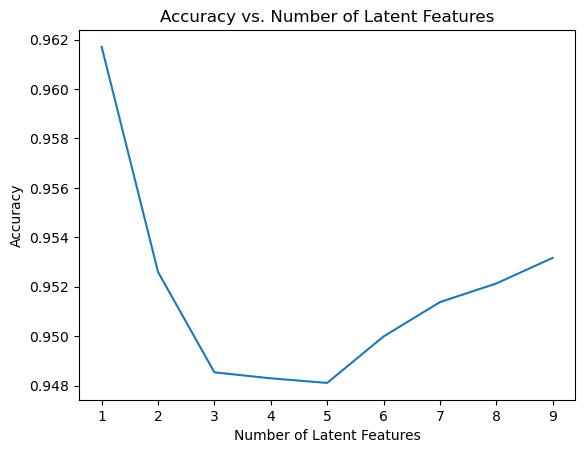

In [40]:
num_latent_feats = np.arange(1,10,1)
test_errs = []


for k in num_latent_feats:
    # Compute estimation for the intersection of train and test users
    s_test, u_test, vt_test = np.diag(s_train[:k]), u_train[test_user_indices, :k], vt_train[:k, test_off_indices]
    
    user_item_est = np.around(np.dot(np.dot(u_test, s_test), vt_test))
    
    test_diffs = np.subtract(user_item_test[user_item_test.index.isin(test_user_ids)], user_item_est)

    # total errors and keep track of them
    test_err = np.sum(np.sum(np.abs(test_diffs)))
    test_errs.append(test_err)
    
    
    
plt.plot(num_latent_feats, 1 - np.array(test_errs)/transcript.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');


##  <a class="anchor" id="Recommendation">Part 12: Recommendation Algorithm Selection</a>


> Well, we have three choices:<br>
1- Rank-Based Recommendations.<br>
2- User-User Based Collaborative Filtering.<br>
3- Matrix Factorization.<br><br><br>
***One can see that the first choice is not really sophisticated, and the third is limited by only 10 latent features!! Thus a logical choice would be User-User Based Collaborative Filtering.***
<br><br>

##  <a class="anchor" id="Future">Part 13: Future Work Enhancements</a>

> A future work can be composed of a couple of additions:<br><br>
1- Using pythonic methods in order to speed up run time.<br>
2- The addition of a better content based recommendation.<br>
3- Using predictive modeling.
<br><br>

##  <a class="anchor" id="Recommend">Part 14: Recommend For a User</a>
> ***Fill in the variable with the user that you want to recommend an offer for!***
<br><br>

In [ ]:
your_user_id = ""


user_user_recs_part2(your_user_id)